# Large assignment 2

## Read before you start

* Provide clear and complete answers in code blocks or markdown. You may add as many as you need.
* Always motivate your answers. This can be done in markdown cells, or in comments in code.
* Submit your results via Brightspace. Use the following filename convention: ``StudentName1_snumber1_StudentName2_snumber2_LargeAssignment2.ipynb``.
* Make sure you submit a fully executed version of the notebook file. The teaching assistants will not run/debug your code during grading.
* Questions? Ask them during the workgroups, or see Brightspace for instructions on how to proceed.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt install jags
!pip install pyjags

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  jags
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,644 kB of archives.
After this operation, 3,492 kB of additional disk space will be used.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ jags 4.3.2-1.2204.0 [1,644 kB]
Fetched 1,644 kB in 0s (4,954 kB/s)
Selecting previously unselected package jags.
(Reading database ... 121920 files and directories currently installed.)
Preparing to unpack .../jags_4.3.2-1.2204.0_amd64.deb ...
Unpacking jags (4.3.2-1.2204.0) ...
Setting up jags (4.3.2-1.2204.0) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtb

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pyjags as pj

print('Using PyJAGS v{:s}'.format(pj.__version__))

plt.rc('axes', titlesize=18)        # fontsize of the axes title
plt.rc('axes', labelsize=18)        # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)       # fontsize of the tick labels
plt.rc('ytick', labelsize=14)       # fontsize of the tick labels
plt.rc('legend', fontsize=12)       # legend fontsize
plt.rc('figure', titlesize=30)      # fontsize of the figure title

Using PyJAGS v1.3.8


# 1. Dentistry

## 1.1 The pilot study

The company DentoCare has developed a new toothbrush, the 'Dentinator 2000'. The toothbrush is first being introduced in France. After DentoCare has introduced the toothbrush to the market, they polled a number of French dentists and asked whether they prefer the Dentinator 2000 or its predecessor, the 'Dentinator Pro'.

The results from the poll are that out of $N_F=238$ French dentists, $z_F=187$ say they recommend the new toothbrush.

DentoCare assumes that, if the Dentinator is performing equal to its predecessor, the recommendations would be 50/50 in favor or against the new toothbrush. To test whether the dentists really prefer the new toothbrush, DentoCare performs Bayesian model comparison.

They define two models, $m_1$, in which there is a preference, and $m_0$ in which the recommendations are pretty much 50/50. In both models, the company uses a binomial likelihood:

$$
    p(z=k \mid N, \theta) = \binom{N}{z} \theta^z (1-\theta)^{N-z} \enspace.
$$

For the null model, DentoCare uses a spike distribution with $c=0.5$:

$$
    p(\theta \mid c) = \text{spike}(\theta \mid c) = \begin{cases}1 & \text{if $\theta=c$,} \\ 0 & \text{otherwise}\end{cases} \enspace,
$$ as the prior.

For the alternative model, they use our familiar beta distribution as a prior instead:

$$
    p(\theta \mid a, b) = \frac{1}{B(a,b)} \theta^{a-1} (1-\theta)^{b-1} \enspace.
$$

In this setting, the Bayes factor $BF_{10}$ can be computed exactly, because of the chosen priors. To compute $BF_{10}$, we need the marginal likelihoods of both models.

1. Derive the expression for the marginal likelihood of $m_1$, $p(z \mid N, m_1)$, in terms of $a, b, z, N$.

_ANSWER:_


For the alternative model m1, the prior is a beta distribution:

$$
     p(\theta \mid a, b) = \frac{1}{B(a,b)} \theta^{a-1} (1-\theta)^{b-1} \enspace.
$$

The marginal likelihood for m1 is obtained by integrating the likelihood wrt the prior:

$$
     p(z \mid N, m_1) = \int_{0}^{1} p(z=k \mid N, θ) * p(θ\mid a, b, m_1)\ dθ
$$

$$
     p(z \mid N, m_1) = \int_{0}^{1} \ \binom{N}{k} θ^{k}(1-θ)^{n-k}\frac{θ^{a-1}(1-θ)^{b-1}}{B(a,b)} dθ
$$

$$
     p(z \mid N, m_1) =  \binom{N}{k} \frac{1}{B(a,b)}\int_{0}^{1} θ^{a+k-1}(1-θ)^{b+n-k-1} \ dθ
$$

The integral is a beta function, tahta we need to evaluate at a+k and b+N-k, which simplifies to:

$$
     p(z \mid N, m_1) = \binom{N}{k} \frac{B(a+k, b+n-k)}{B(a, b)}
$$





2. Similarly, derive the expression for the marginal likelihood of $m_0$, $p(z \mid N, m_0)$ in terms of $c, z, N$.

_ANSWER:_

For the null model m0, the prior is a spike at 0.5:

$$
    p( \theta\mid m_0) = spike(\theta \mid c) \enspace.
$$

$$
p(z | N, m_0) = \binom{N}{z} c^z (1 - c)^{N - z}
$$

$$
\text{Since } c = 0.5, \text{ this simplifies to:}
$$

$$
p(z | N, m_0) = \binom{N}{z} (0.5)^z (0.5)^{N - z}
$$

$$
\text{Combining the terms, we get:}
$$

$$
p(z | N, m_0) = \binom{N}{z} (0.5)^N
$$


__Practical note:__

You are almost ready to compute the Bayes factor. However, there is one important caveat: some terms in the marginal likelihood can result in numerical issues. For example $\binom{238}{187}\approx 3.19 \times 10^{52}$, and when working with such huge numbers, we might run into numerical under- and overflow. In practice, we therefore often compute the _log_ marginal likelihoods and _log_ Bayes factor. From basic algebra it follows that

$$
 \log BF_{10} = \log \left(\frac{p(z \mid N, m_1)}{p(z \mid N, m_0)} \right) = \log p(z \mid N, m_1) - \log p(z \mid N, m_0) \enspace.
$$

To proceed, we need to determine the logarithm of both of the marginal likelihoods, that is $\log p(z \mid N, m_1)$ and $\log p(z \mid N, m_0)$. Here are some hints for this derivation as well as the implementation for the next question:

- We can rewrite
$$
    \log \binom{N}{z} = -\log(N+1) - \log(B(N-z+1, z+1)) \enspace.
$$
- $\log B(a, b)$ is implemented in `scipy.special.betaln(a, b)`.

3. Derive the expressions for the _log_ marginal likelihoods for both models (see https://en.wikipedia.org/wiki/Logarithm if you need a refresher on logarithms).

_ANSWER:_
$$
\log BF_{10} = \log \left( \frac{p(z | N, m_1)}{p(z | N, m_0)} \right) = \log p(z | N, m_1) - \log p(z | N, m_0)
$$

$$
\text{where for the null model } m_0:
$$

$$
\log p(z | N, m_0) = \log \binom{N}{z} + N \log(0.5)
$$

$$
\text{and using the hint, this can be rewritten as:}
$$

$$
\log p(z | N, m_0) = -\log(N + 1) - \log B(N - z + 1, z + 1) + N \log(0.5)
$$

$$
\text{For the alternative model } m_1:
$$

$$
\log p(z | N, m_1) = \log \binom{N}{z} + \text{betaln}(a + z, b + N - z) - \text{betaln}(a, b)
$$

$$
\text{Using the logarithm properties and the given hint, it simplifies to:}
$$

$$
\log p(z | N, m_1) = -\log(N + 1) - \log B(N - z + 1, z + 1) + \text{betaln}(a + z, b + N - z) - \text{betaln}(a, b)
$$



4. Now implement these computations using `Numpy` and `scipy.special.betaln`. Determine the log marginal likelihoods, and with these, compute $\log BF_{10}$ and $BF_{10}$ (which is of course $\exp\log BF_{10}$).

_ANSWER:_

In [4]:
from scipy.special import comb
from scipy.special import betaln

N = 238 # Total number of trials (dentists)
z = 187 # Number of successes (dentists recommending the new toothbrush)
a = b = 1 # Parameters for the Beta distribution (symmetric, uninformative prior)
c = 0.5 # Probability of success under the null model (no preference)

# log marginal likelihood for m0
# For a spike at c = 0.5, the log marginal likelihood for m0 is the likelihood at theta = 0.5
log_p_m0 = np.log(comb(N, z)) + z * np.log(c) + (N - z) * np.log(1 - c)

# Compute log marginal likelihood for m1
# For m1, the log marginal likelihood involves the betaln function
log_p_m1 = np.log(comb(N, z)) + betaln(a + z, b + N - z) - betaln(a, b)

# Compute log Bayes factor
log_BF10 = log_p_m1 - log_p_m0

# Compute Bayes factor
BF10 = np.exp(log_BF10)

# Print the results
print(f'log_p_m0: {log_p_m0}')
print(f'log_p_m1: {log_p_m1}')
print(f'log_BF10: {log_BF10}')
print(f'BF10: {BF10}')

log_p_m0: -44.07502703987659
log_p_m1: -5.476463551931516
log_BF10: 38.59856348794507
BF10: 5.7961969258180344e+16


5. Consult the Bayes factor interpretation table (slide 23, Lecture 7). What is the conclusion from this little experiment? Does it match your intuition?

_ANSWER:_

From the results we got back, the Bayes Factor BF10 is around $$5.796×10^{16}$$. This si a very large number, indicating very strong evidence in favor of m1 over the null model. So there is a preference among dentist in France for the new toothbrush. This matches our intuition because its newer and better. We didnt think the BF would be that high based on the number of dentist out of all of them.

## 1.2 Comparison with another country

After these promising results, DentoCare now also releases the Dentinator 2000 in Spain. For complicated political reasons, DentoCare wonders whether there is a difference in reception of the new toothbrush between France ($F$) and Spain ($S$), so they poll in Spain as well. They find $N_S = 338$ and $z_S=229$ (compared to $N_F=238, z_F=187$).

Again, DentoCare uses Bayesian model comparison for their analysis. They want to find out whether Spain and France respond differently to the new toothbrush. In their null model, $m_0$, there is no difference, which means $\theta_F = \theta_S$. In the alternative model, $m_1$, there _is_ a difference, which means $\theta_F \neq \theta_S$.

There are several ways we could implement this model comparison, but an exact solution will be difficult. For this exercise, we shall use the approach with the categorical model variable `m` in JAGS.

1. First, write down the generative models for $m_0$ and $m_1$. Pick convenient (conjugate) likelihoods and (uninformative) priors.

_ANSWER:_

Model indicator:
$$
m \sim \text{Categorical}(p(m))
$$

Priors for null model ($m_0$):
$$
\theta \sim \text{Beta}(a, b)
$$

Priors for alternative model ($m_1$):
$$
\theta_F \sim \text{Beta}(a, b) \\
\theta_S \sim \text{Beta}(a, b)
$$

Likelihood:
$$
z_F | N_F, m, \theta, \theta_F \sim \text{Binomial}\left(N_F, \mathbb{I}(m = 1) \theta_F + \mathbb{I}(m = 0) \theta \right) \\
z_S | N_S, m, \theta, \theta_S \sim \text{Binomial}\left(N_S, \mathbb{I}(m = 1) \theta_S + \mathbb{I}(m = 0) \theta \right)
$$


2. Now implement the model comparison in JAGS. See slide #33, Lecture 7 for the outline of how to do this. Hint: you can use the fact that in $m_0$, $\theta_S$ and $\theta_F$ are the same. That means you can sample one, and then _set_ the other.

_ANSWER:_


In [5]:
jags_model = '''
model {
  # Model indicator
  m ~ dcat(model_probs[]) # could take 0 (null model) or 1 (alternative) as values.

  # Priors for null model (m_0)
  theta ~ dbeta(a, b)

  # Priors for alternative model (m_1)
  theta_F ~ dbeta(a, b)
  theta_S ~ dbeta(a, b)

  # Likelihood
  z_F ~ dbin(ifelse(m == 1, theta_F, theta), N_F)
  z_S ~ dbin(ifelse(m == 1, theta_S, theta), N_S)
}
'''

# Model probabilities (e.g., equal probabilities for each model)
model_probs = [0.5, 0.5]  # Adjust as needed based on prior beliefs about models

# Data setup
data = {
    'N_F': 238,
    'z_F': 187,
    'N_S': 338,
    'z_S': 229,
    'model_probs': model_probs,
    'a': 1,
    'b': 1
}

# Number of samples and chains
num_samples = 100000
num_chains = 4

# JAGS model setup
model = pj.Model(jags_model, data=data, chains=num_chains)

# Variables to monitor, including the model index 'm'
vars_to_sample = ['m', 'theta_F', 'theta_S']

# Sampling
samples = model.sample(num_samples, vars=['m', 'theta', 'theta_F', 'theta_S'])
print('Sampling complete.')



adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 400000 of 400000, elapsed 0:00:02, remaining 0:00:00
Sampling complete.


3. Compute the posterior model probabilities and the Bayes factor of this comparison. Interpret the Bayes factor according to the interpretation table. What do you conclude about the difference between French and Spanish dentists?

_ANSWER:_


In [6]:
# Compute posterior probabilities assuming equal prior probabilities for both models
model_counts = np.unique(samples['m'], return_counts=True)[1]
model_probs = model_counts / sum(model_counts)
posterior_probability_m1 = model_probs[1]
posterior_probability_m0 = model_probs[0]
BF = model_probs[1] / model_probs[0]

print(f"Posterior Probability for m1 (Difference):", posterior_probability_m1)
print(f"Posterior Probability for m0 (No Difference):", posterior_probability_m0)
print("Bayes factor: ", BF)

Posterior Probability for m1 (Difference): 0.144095
Posterior Probability for m0 (No Difference): 0.855905
Bayes factor:  0.1683539645170901


there is strong evidence supporting m0, indicating absence of significant difference in the acceptance of the new toothbrush between French and Spanish dentists.

# 1.3 Another method for the same goal

Interestingly, there are multiple ways to Rome. With the same models, but a slightly different variation, we can perform another model comparison. Time to test whether they are consistent (hopefully!).

Let us first reformulate alternative model used earlier, $m_1$, to explicitly learn the difference in preference between France and Spain, $\delta=\theta_F-\theta_S$. Note that in the null model, $\delta=0$ by design! This means we can use the Savage-Dickey approach, as the null model is a special case of $m_1$, where $\delta$ is exactly 0.

Using the Savage-Dickey approach, we can compute the Bayes factor as follows:

$$
    BF_{10} = \frac{p(D \mid m_1)}{p(D \mid m_0)} = \frac{p(\delta=\delta_0 \mid m_1)}{p(\delta=\delta_0 \mid D, m_1)} \enspace,
$$

where $\delta_0$ is the value implied by the null model. In our dentistry case, the null model states that $\delta=\theta_F - \theta_S = 0$.

Note that we have not specified a prior on $\delta$ -- at least, not explicitly. However, if we add $\delta=\theta_F-\theta_S$ to our generative model and our JAGS implementation, then if we do not provide observations ($z$) to our model, we simply sample from the prior. This way, we can obtain samples from $\delta \sim p(\delta=\delta_0 \mid m_1)$. If we do add data $z$ to condition on, then we obtain samples from $\delta \sim p(\delta=\delta_0 \mid D, m_1)$.

1. Implement model $m_1$ with the explicit sampling of $\delta=\theta_F - \theta_S$. Collect samples from the prior, and collect samples from the posterior. Visualize both a histograms within one figure.

Tip: you can choose to run the model twice, once conditioned on data, the other time not, but you can also add both the same model definition, which is a bit cleaner. Here is an example of how you could do this for a simple coin flip model. In JAGS you would write:

```
theta ~ dbeta(a,b)
theta.prior ~ dbeta(a,b)
x ~ dbern(theta)
```

and then in Python you'd write:

```
samples = m.sample(num_samples, vars=['theta', 'theta.prior'])
```

This would give you samples from the posterior (`theta`) and from the prior (`theta.prior`) in one go.


_ANSWER:_



In [7]:
from scipy.stats import gaussian_kde

jags_model = '''
model {
    ## Prior
    theta_F ~ dbeta(a, b);  # Uniform prior for France
    theta_S ~ dbeta(a, b);  # Uniform prior for Spain

    # Calculating the difference
    delta <- theta_F - theta_S;  # Difference in preferences

    ## Likelihood
    z_F ~ dbin(theta_F, N_F);  # Binomial likelihood for France
    z_S ~ dbin(theta_S, N_S);  # Binomial likelihood for Spain

    # Prior for delta (for visualization and comparison)
    delta_prior ~ dbeta(1, 1);
}
'''


N_F = 238
z_F = 187
N_S = 338
z_S = 229

data = dict(
    N_F=N_F,
    z_F=z_F,
    N_S=N_S,
    z_S=z_S
)
num_samples = 100000
num_chains = 4

data['a'] = 1
data['b'] = 1


model = pj.Model(jags_model, data=data, chains=num_chains)
samples = model.sample(num_samples, vars=['delta', 'delta_prior'])
print('Sampling complete.')



adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 400000 of 400000, elapsed 0:00:01, remaining 0:00:00
Sampling complete.


Shape of 'delta' samples: (1, 100000, 4)
Shape of 'delta_prior' samples: (1, 100000, 4)


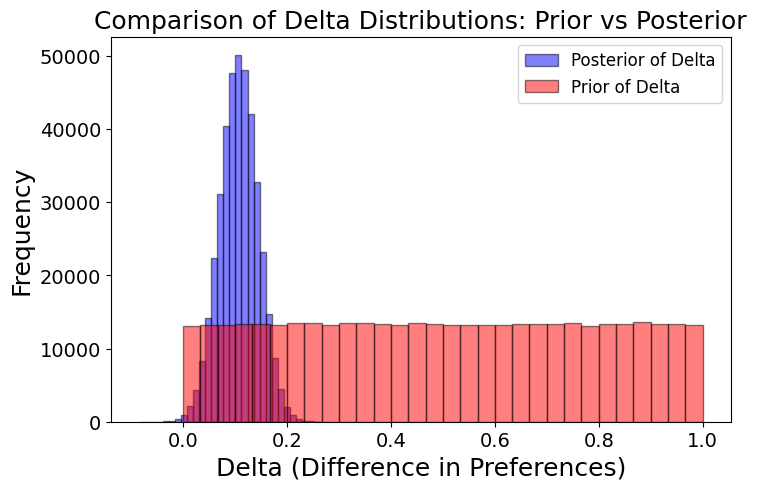

In [8]:
plt.figure(figsize=(8, 5))
ax = plt.gca()



# Histogram of Posterior of Delta
posterior_delta = samples['delta']  # Assume 'delta' is collected as posterior samples
# Debug: Check the shape of the data
print("Shape of 'delta' samples:", np.shape(samples['delta']))
print("Shape of 'delta_prior' samples:", np.shape(samples['delta_prior']))


# Histogram of Prior of Delta
posterior_delta = samples['delta'].flatten()
ax.hist(posterior_delta, bins=30, alpha=0.5, label='Posterior of Delta', color='blue', edgecolor='black')

prior_delta = samples['delta_prior'].flatten()  # Assume 'delta_prior' is collected as prior samples
ax.hist(prior_delta, bins=30, alpha=0.5, label='Prior of Delta', color='red', edgecolor='black')

# Enhancing the plot
ax.set_xlabel('Delta (Difference in Preferences)')
ax.set_ylabel('Frequency')
ax.legend()
ax.set_title('Comparison of Delta Distributions: Prior vs Posterior')
plt.show()

In order to compute the Savage-Dickey density ratio, we need to obtain the probabilities indicated at the value $\delta=0$ in these histograms. However, reading that with the naked eye from histograms is not particularly accurate. Instead, we shall use _kernel density estimation_. This technique smooths the histogram, but also allows us to query the probability density function that the histogram approximates, at any location of our choice. The function we use is `scipy.stats.gaussian_kde` (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html). The term 'Gaussian' has to do with how it smooths the histogram, not with the distributions we use in our model!

2. Determine the PDFs of the posterior and the prior distributions $p(\delta \mid m_1)$ by applying the `gaussian_kde` function on the samples from your JAGS model. Plot these PDFs as a function from the whole possible range of $\delta$ ($\delta \in [-1, 1]$). Add a black dot at the points where the prior and the posterior intersect the vertical line where $\delta=0$, as implied by $m_0$ (you can add such a dot with `ax.plot(..., ..., 'o', color='k')`.

Note: The `p = gaussian_kde` function returns another function. This function is the approximated PDF, based on the samples you used. You can query `p` for example like `p([0.1, 0.2, 0.3])` or `p(np.linspace(0, 1, num=40)`. If you want to query it at one specific number, write: `p([number])` (note the square brackets).

_ANSWER:_

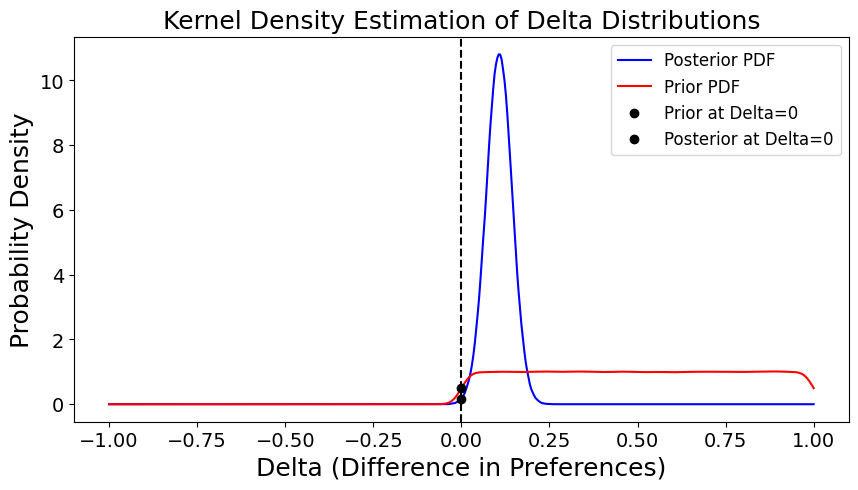

In [9]:
from scipy.stats import gaussian_kde

posterior_kde = gaussian_kde(posterior_delta)
prior_kde = gaussian_kde(prior_delta)


delta_min, delta_max = -1.0, 1.0
delta_range = np.linspace(delta_min, delta_max, num=500)


posterior_pdf = posterior_kde(delta_range)
prior_pdf = prior_kde(delta_range)

plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.plot(delta_range, posterior_pdf, label='Posterior PDF', color='blue')
ax.plot(delta_range, prior_pdf, label='Prior PDF', color='red')


ax.plot(0, prior_kde([0]), 'o', color='k', label='Prior at Delta=0')
ax.plot(0, posterior_kde([0]), 'o', color='k', label='Posterior at Delta=0')

ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Delta (Difference in Preferences)')
ax.set_ylabel('Probability Density')
ax.legend()
ax.set_title('Kernel Density Estimation of Delta Distributions')

plt.show()

3. Now use the values at these black dots to compute the Bayes factor of the comparison using the Savage-Dickey approach. Is it close to the value you found with JAGS (let's call it close if they are within 10% of each other) in question 1.2.3?

Remember that both approaches are based on MCMC sampling; they are not exact. If you find results that are roughly within the same ballpark, but further than 10% apart, you might simply want to increase the number of JAGS samples.

_ANSWER:_

In [10]:
# Calculate densities at delta = 0
posterior_density_at_delta_0 = posterior_kde([0])[0]  # Density from the posterior
prior_density_at_delta_0 = prior_kde([0])[0]  # Density from the prior

# Calculate the Bayes factor using the Savage-Dickey density ratio
BF10_savage_dickey = posterior_density_at_delta_0 / prior_density_at_delta_0

print(f"Posterior density at delta=0: {posterior_density_at_delta_0}")
print(f"Prior density at delta=0: {prior_density_at_delta_0}")
print(f"Savage-Dickey Bayes Factor (BF10): {BF10_savage_dickey}")

Posterior density at delta=0: 0.1757934116669876
Prior density at delta=0: 0.492983696976101
Savage-Dickey Bayes Factor (BF10): 0.35659072043412776


There is significant difference between the two.

We saw in the lectures that in order to compute Bayes factors, we need marginal likelihoods, and that these are very sensitive to the prior distribution in a model. That applies here as well.

Here, we explore what happens to the Bayes factor if we change the prior from extremely weak (uninformative) to extremely strong.

4. First, use the code template below to plot the prior and posterior for $m_1$ for different $q$ values of $a$ and $b$ (for simplicity, we keep $a=b$ here). Note that a `logspace` is used; so we explore values starting at 1, and ending with 1000, in logarithmically spaced steps. Explain what happens to the prior, and what happens to the posterior, as $a$ and $b$ are increased.

_ANSWER:_



adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:01, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00


<timed exec>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:00, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 200000 of 200000, elapsed 0:00:01, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:00, remaining 

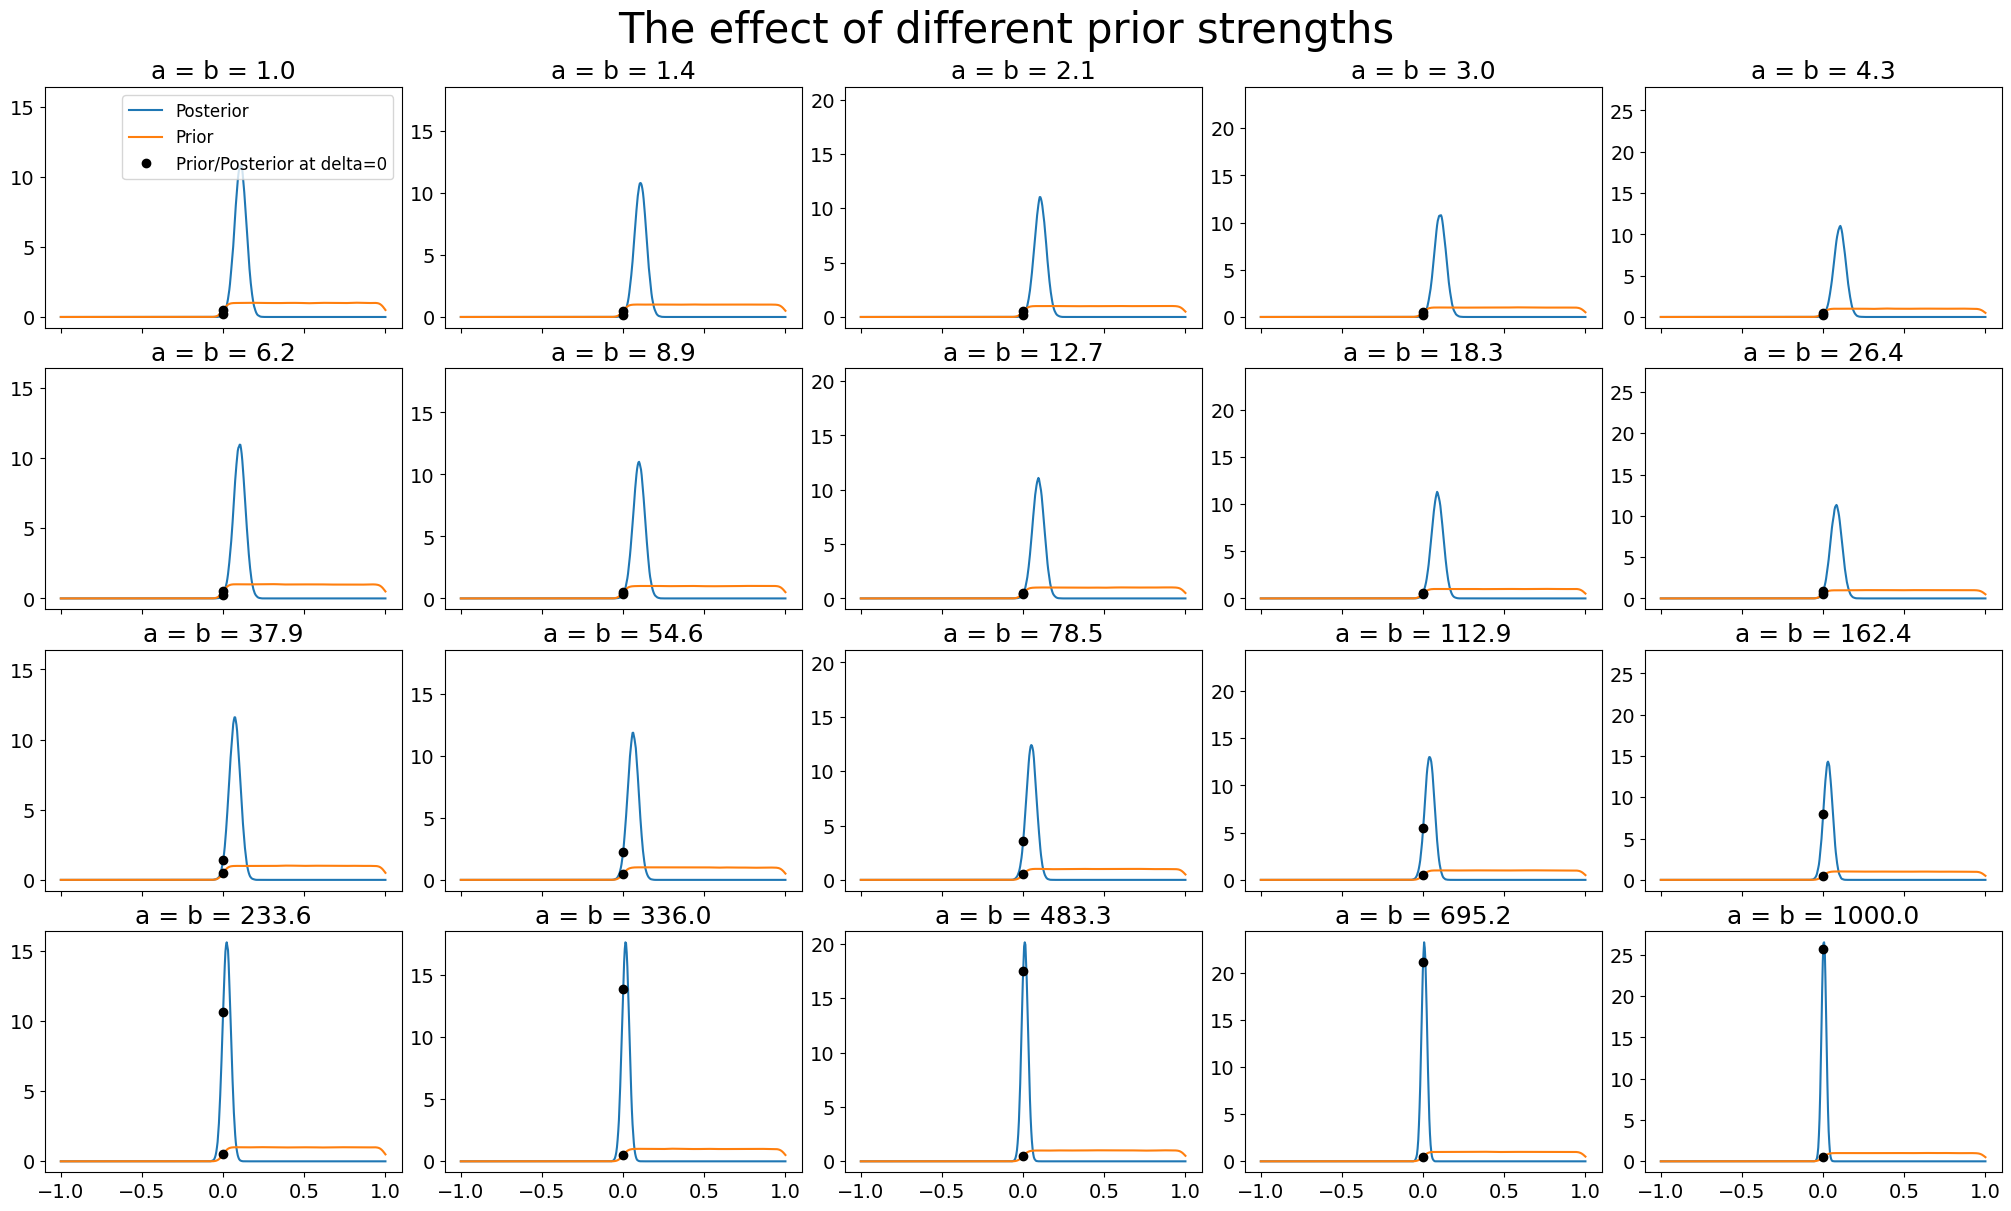

CPU times: user 1min 45s, sys: 7.08 s, total: 1min 52s
Wall time: 1min 55s


In [11]:
%%time
num_samples = 50000
num_chains = 4

q = 20
as_ = np.logspace(0, 3, num=q)
bs_ = np.logspace(0, 3, num=q)

delta_according_to_m0 = 0
bayes_factors = np.zeros(q)

_, axes = plt.subplots(nrows=4, ncols=5, sharex=True, sharey='col',
                       constrained_layout=True, figsize=(20, 12))

for i, (a_, b_) in enumerate(zip(as_, bs_)):
    ax = axes.flatten()[i]  # plot in this axis

    data = {
        'a': a_,
        'b': b_,
        'N_F': 238,  # Total number of trials in France
        'z_F': 187,  # Number of successes in France
        'N_S': 338,  # Total number of trials in Spain
        'z_S': 229   # Number of successes in Spain
    }


    m_ = pj.Model(jags_model, data=data, chains=num_chains)
    samples_ = m_.sample(num_samples, vars=['delta', 'delta_prior'])
    posterior_ = gaussian_kde(samples_['delta'].flatten())
    prior_ = gaussian_kde(samples_['delta_prior'].flatten())

    delta_range = np.linspace(-1, 1, num=500)

    ax.plot(delta_range, posterior_.evaluate(delta_range), label='Posterior') # posterior PDF
    ax.plot(delta_range, prior_.evaluate(delta_range), label='Prior') # prior PDF

    # Bayes factor as the ratio of posterior to prior at delta=0
    bayes_factors[i] = posterior_kde(delta_according_to_m0) / prior_kde(delta_according_to_m0)

    ax.plot(delta_according_to_m0, prior_.evaluate([delta_according_to_m0]), 'o', color='k', label='Prior/Posterior at delta=0')
    ax.plot(delta_according_to_m0, posterior_.evaluate([delta_according_to_m0]), 'o', color='k')

    ax.set_title(f"a = b = {a_:.1f}")
    if i == 0:
        ax.legend()

plt.suptitle('The effect of different prior strengths')
plt.show()



5. Now make a single figure in which you plot the Bayes factor of this model comparison as a function of $a$ ($=b$) on the x-axis. You should see an initial increase in the Bayes factor, but then the Bayes factor decays to some asymptotic value. What is this value, and why does it make sense that the Bayes factor converges here, as we increase the strength of the prior? What does this mean for the model comparison?

_ANSWER_:



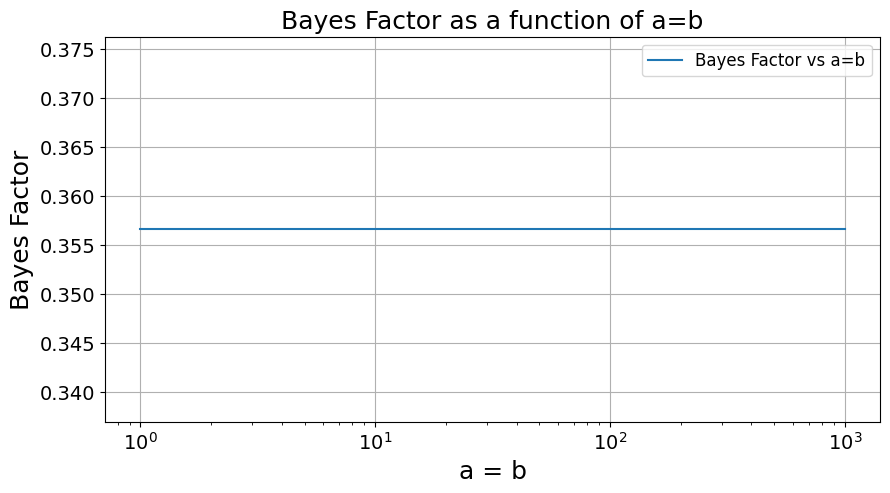

In [12]:
plt.figure(figsize=(10, 5))
plt.semilogx(as_, bayes_factors, label='Bayes Factor vs a=b')
plt.xlabel('a = b')
plt.ylabel('Bayes Factor')
plt.title('Bayes Factor as a function of a=b')
plt.legend()
plt.grid(True)
plt.show()

---
# 2. Time for a drink

After all this analysis for DentoCare, it is time to set our sights on a more enjoyable topic: booze. In this part of the exercise we'll study the quality of red wine ($y$), as a function of its chemical properties ($x$), such as pH, alcohol content, citric acid levels, and so on.

Our data set consists of $N=1599$ wines, and for each we have observed $p=11$ of these properties.

We'll try to figure out, using Bayesian testing, which of these properties are important for predicting wine quality, and which are not. To do so, we make use of the generalized linear model again, and describe our model as:

$$
    \begin{align}
        \beta_j &\sim \mathcal{N}(\beta_j \mid \mu_{\beta}, \sigma_{\beta}) && j=0, \ldots, p\\
        y_i \mid \mathbf{x}_i, \mathbf{\beta} &\sim \mathcal{N}(y_i \mid \beta_0 + \mathbf{x}_i^\top \mathbf{\beta}, \sigma_y) && i =1,\ldots, N\enspace,
    \end{align}
$$

Importantly, the quality of the wine is a linear combination of the chemical properties and the coefficients $\mathbf{\beta}$. Note that $\beta$ is a vector of $p+1$ elements, as it also contains the intercept $\beta_0$.

The code below loads the data, and makes a figure of the distribution of the feature and outcome values.

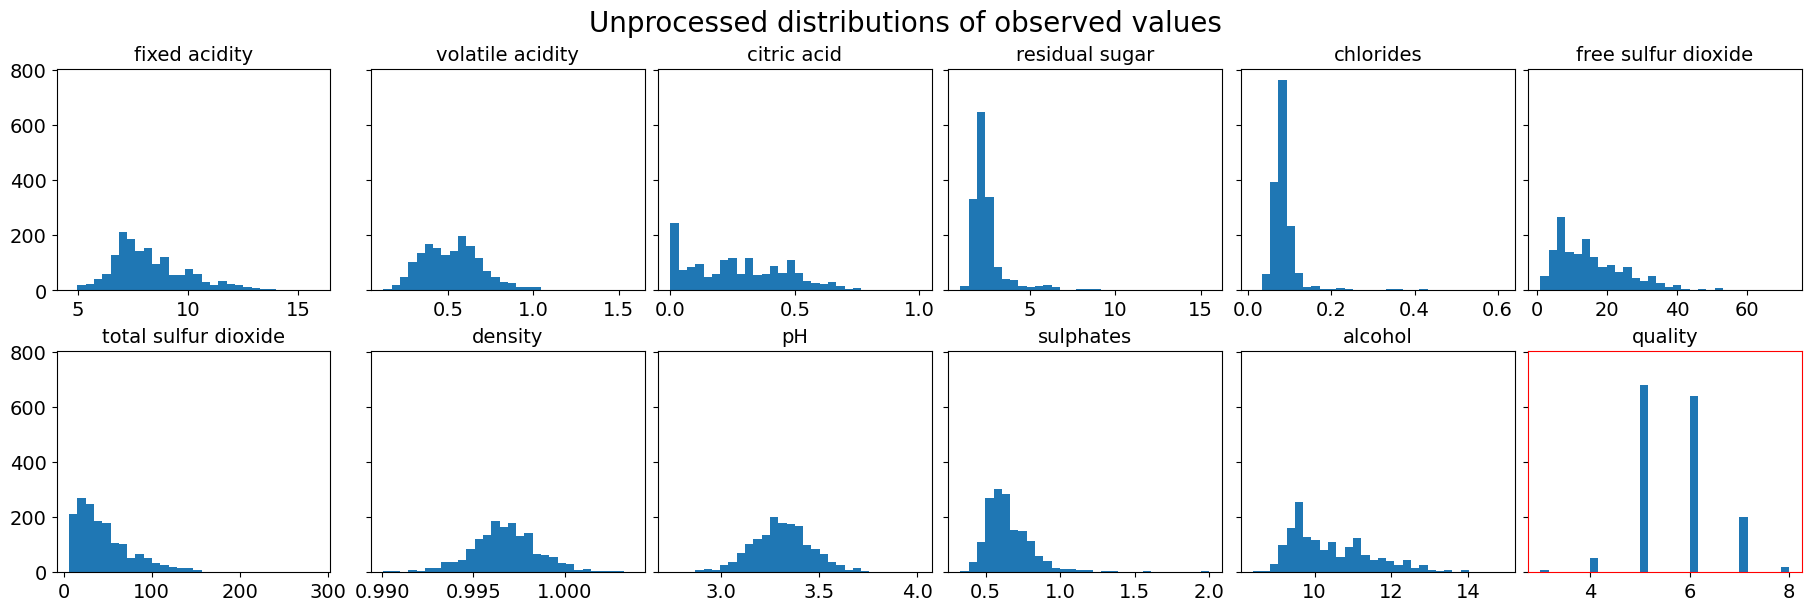

In [13]:
import pandas as pd
filename = 'winequality-red.csv'

df = pd.read_csv(filename, sep=';')
feature_names = df.columns
x = df.values[:, 0:-1]
y = df.values[:, -1]
n, p = x.shape

_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True,
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i < p:
        ax.hist(x[:, i], bins=30)
    else:
        ax.hist(y, bins=30)
    ax.set_title(feature_names[i], fontsize=14)

ax = axes.flatten()[-1]
for _, spine in ax.spines.items():
    spine.set_color('red')
    spine.set_color('red')

plt.suptitle('Unprocessed distributions of observed values', fontsize=20);

**Practical note**: Notice how the different features have very different _ranges_ of possible values. For instance, the citric acid ranges from 0 to 0.7 (ish), whereas the alcohol percentage is in the range 9--14. This makes it hard to compare the regression coefficients $\beta$ with each other, as these coefficients will have to adjust to the scales of the corresponding predictor. For example, suppose the pH increases from 0.5 to 0.6, and let $\beta_{\text{pH}}=3.2$. This means a change in $y$ of $3.2(0.6-0.5) = 0.32$. If $\beta_{\text{alcohol}}=3.2$, and alcohol increases from 12% to 13%, then the change in $y$ is $3.2(13-12)=3.2$. A much bigger change in $y$, even though relatively speaking the predictors didn't change that much differently.

The standard data science approach to address this, is to standardize our input, so that every predictor has mean 0 and standard deviation 1. We shall adopt this approach here.

1. Preprocess the features $x$ by, for each column of $x$, subtracting the mean $\mu(x)$ and dividing by the standard deviation $\sigma(x)$. Make another figure like the one above, but show the scaled versions of $x$. Make sure that indeed the mean of each histogram is now at 0. Do the same for the last observed value, the target wine quality $y$.

_ANSWER:_

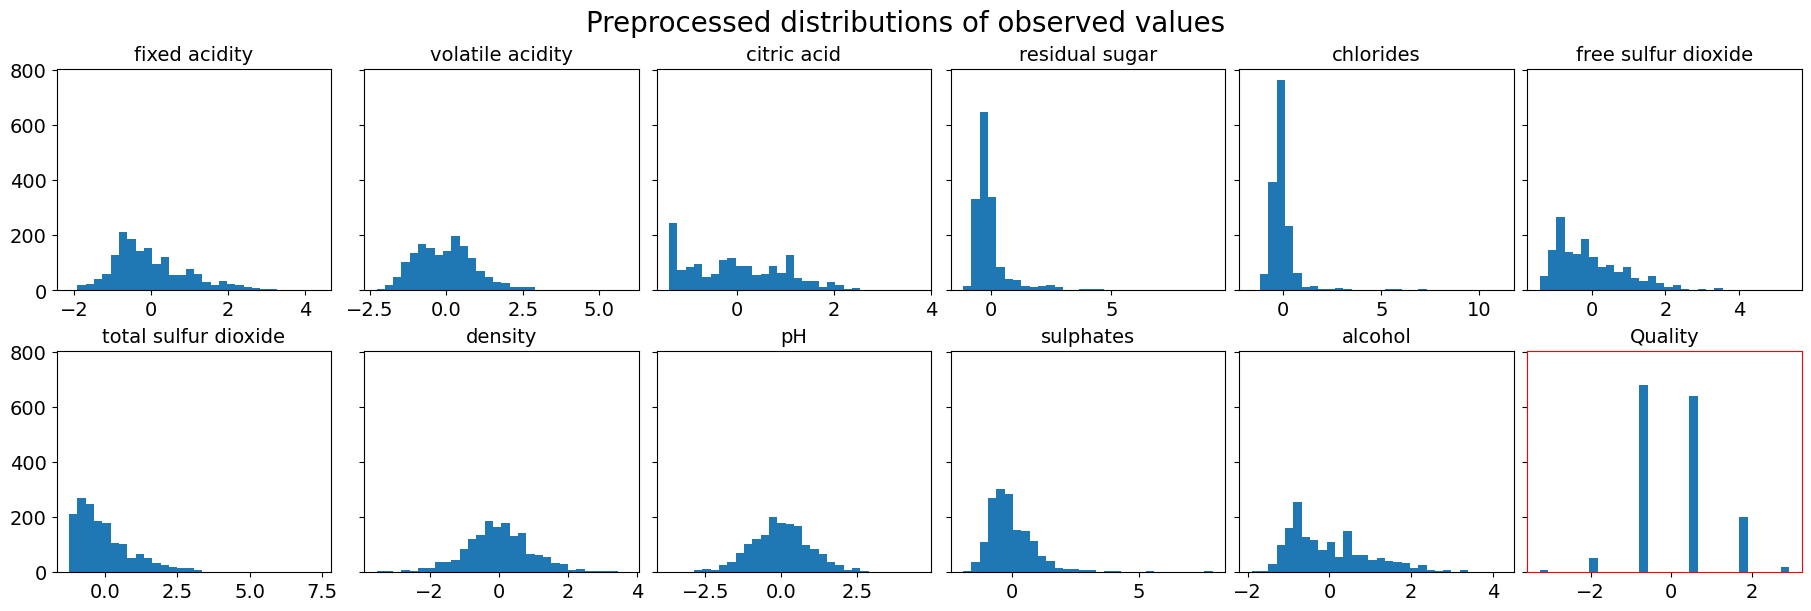

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've loaded the DataFrame as df already
x = df.values[:, 0:-1]
y = df.values[:, -1]

# Standardize features
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x = (x - x_mean) / x_std

# Standardize the target variable
y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std

n, p = x.shape
feature_names = df.columns[:-1].tolist()  # Assumed the features' names are correctly fetched
feature_names.append('Quality')  # Append 'Quality' for the last plot of y

# Plotting the standardized distributions
_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True,
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i < p:
        ax.hist(x[:, i], bins=30)
        ax.set_title(feature_names[i], fontsize=14)
    elif i == p:  # Ensure there is space for the target variable histogram
        ax.hist(y, bins=30)
        ax.set_title('Quality', fontsize=14)

# Highlight the last plot with red spines
ax = axes.flatten()[-1]
for _, spine in ax.spines.items():
    spine.set_color('red')

plt.suptitle('Preprocessed distributions of observed values', fontsize=20)
plt.show()

Now we can start constructing a Bayesian multiple regression model.

**Practical note**: Clearly $y$ does not follow a Gaussian distribution, even after our transformation. For simplicity, we shall stick to Gaussians, but if you're using this exercise to buy your next wine, be warned that better modelling choices are available.

You have already done part of this in Large Assignment 1, and you are free to re-use your (**own!**) code from that assignment -- there is no need to reinvent the wheel if you are happy with that solution. However, we have several more predictors now though, so a linear algebra expression such as `inprod(...)` will be needed to make robust code.

2. Implement a Bayesian multiple linear regression model that predicts wine quality from the observed features, with the prior and likelihood as mentioned here. Make a figure showing for each of the 11 predictors $\beta_j, j=1, \ldots, p$ as well as intercept $\beta_0$ the approximate posterior distribution. Be sure to use the `inprod(...)` approach.


_ANSWER:_



In [22]:
%%time
jags_model = '''
  model{
      # Prior
      for (j in 1:p) {
          beta[j] ~ dnorm(0, 1 / pow(sigma_beta, 2))
      }
      beta0 ~ dnorm(0, 1 / pow(sigma_beta, 2))

      # Likelihood
      for (i in 1:N) {
          y[i] ~ dnorm(mu[i], 1 / pow(sigma_y, 2))
          mu[i] = beta0 + inprod(x[i, 1:p], beta[1:p])
      }

      # Hyperpriors
      sigma_beta ~ dunif(0, 100)
      sigma_y ~ dunif(0, 100)
  }
'''


data = dict(x=x, y=y, N=n, p=p, sigma_beta=5, sigma_y=2)

num_samples = 20000
num_chains = 4
m = pj.Model(jags_model, data=data, chains=num_chains)

samples = m.sample(num_samples, vars=["beta","beta0"])
print('Sampling complete.')

sampling: iterations 2572 of 80000, elapsed 0:00:07, remaining 0:03:31
sampling: iterations 6356 of 80000, elapsed 0:00:17, remaining 0:03:17
sampling: iterations 10148 of 80000, elapsed 0:00:26, remaining 0:02:57
sampling: iterations 12124 of 80000, elapsed 0:00:32, remaining 0:02:57
sampling: iterations 15988 of 80000, elapsed 0:00:41, remaining 0:02:44
sampling: iterations 17932 of 80000, elapsed 0:00:47, remaining 0:02:41
sampling: iterations 21788 of 80000, elapsed 0:00:57, remaining 0:02:31
sampling: iterations 25644 of 80000, elapsed 0:01:06, remaining 0:02:19
sampling: iterations 27596 of 80000, elapsed 0:01:12, remaining 0:02:16
sampling: iterations 31464 of 80000, elapsed 0:01:21, remaining 0:02:04
sampling: iterations 33416 of 80000, elapsed 0:01:26, remaining 0:02:00
sampling: iterations 37292 of 80000, elapsed 0:01:36, remaining 0:01:50
sampling: iterations 39228 of 80000, elapsed 0:01:41, remaining 0:01:45
sampling: iterations 43112 of 80000, elapsed 0:01:52, remaining 0:

In [24]:

def get_hdi(s, intv=0.95):
    sorted_samples = np.sort(s)
    n_samples = len(sorted_samples)
    n_interval = int(np.floor(intv * n_samples))
    interval_idx = np.arange(0, n_samples - n_interval)
    intervals = sorted_samples[interval_idx + n_interval] - sorted_samples[interval_idx]
    min_idx = np.argmin(intervals)
    hdi_min = sorted_samples[interval_idx[min_idx]]
    hdi_max = sorted_samples[interval_idx[min_idx] + n_interval]
    return hdi_min, hdi_max

#
beta_samples = samples['beta']
beta_0_samples = samples['beta_0']

feature_names = df.columns[:-1].tolist()  # Assuming the feature names are set correctly
feature_names.append('Intercept')  # Include intercept as the last plot if needed

_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True,
                       figsize=(18, 6))

for i, ax in enumerate(axes.flatten()):
    if i < p:  # Ensure this aligns with the number of features (11 in your case)
        # Flatten chains into a single array for plotting
        data = beta_samples[i].reshape(-1)
        ax.hist(data, bins=30, density=True, alpha=0.7, color='blue')
        ax.set_title(feature_names[i])

        # Calculate and display HDI
        hdi_min, hdi_max = get_hdi(data)
        ax.axvline(x=hdi_min, color='red', linestyle='--')
        ax.axvline(x=hdi_max, color='red', linestyle='--')
    elif i == p:  # If there's a specific subplot for the intercept
        # Assuming intercept is handled separately and similarly structured
        data = beta_0_samples.reshape(-1)
        ax.hist(data, bins=30, density=True, alpha=0.7, color='blue')
        ax.set_title('Intercept')

        # Calculate and display HDI for the intercept
        hdi_min, hdi_max = get_hdi(data)
        ax.axvline(x=hdi_min, color='red', linestyle='--')
        ax.axvline(x=hdi_max, color='red', linestyle='--')

for ax in axes[1, :]:
    ax.set_xlabel(r'$\beta$')
for ax in axes[:, 0]:
    ax.set_ylabel(r'$p(\beta \mid X, y)$')

plt.suptitle('Approximated posterior distribution', fontsize=20);
plt.show()

KeyError: 'beta_0'

The question of 'which feature is important in predicting wine quality?' is also a form of model comparison / hypothesis testing. In a way, we are comparing $2^{11}$ models here -- because each of the $p=11$ predictors can either be important or not.

3. Use your posterior distributions to determine the 95% HDI for each of the predictors, and make a new figure where you show this interval on top of your posterior distributions. You can use, for example, the `ax.axvspan(..., alpha=0.2)` code. In addition, include a vertical line (with a clearly distinguishable color/linestyle) that represents for each predictor the null hypothesis that says this predictor is _not_ important (think about that this means for the corresponding $\beta$). According to this analysis, which features are important? Explain how you got to your answer.

12


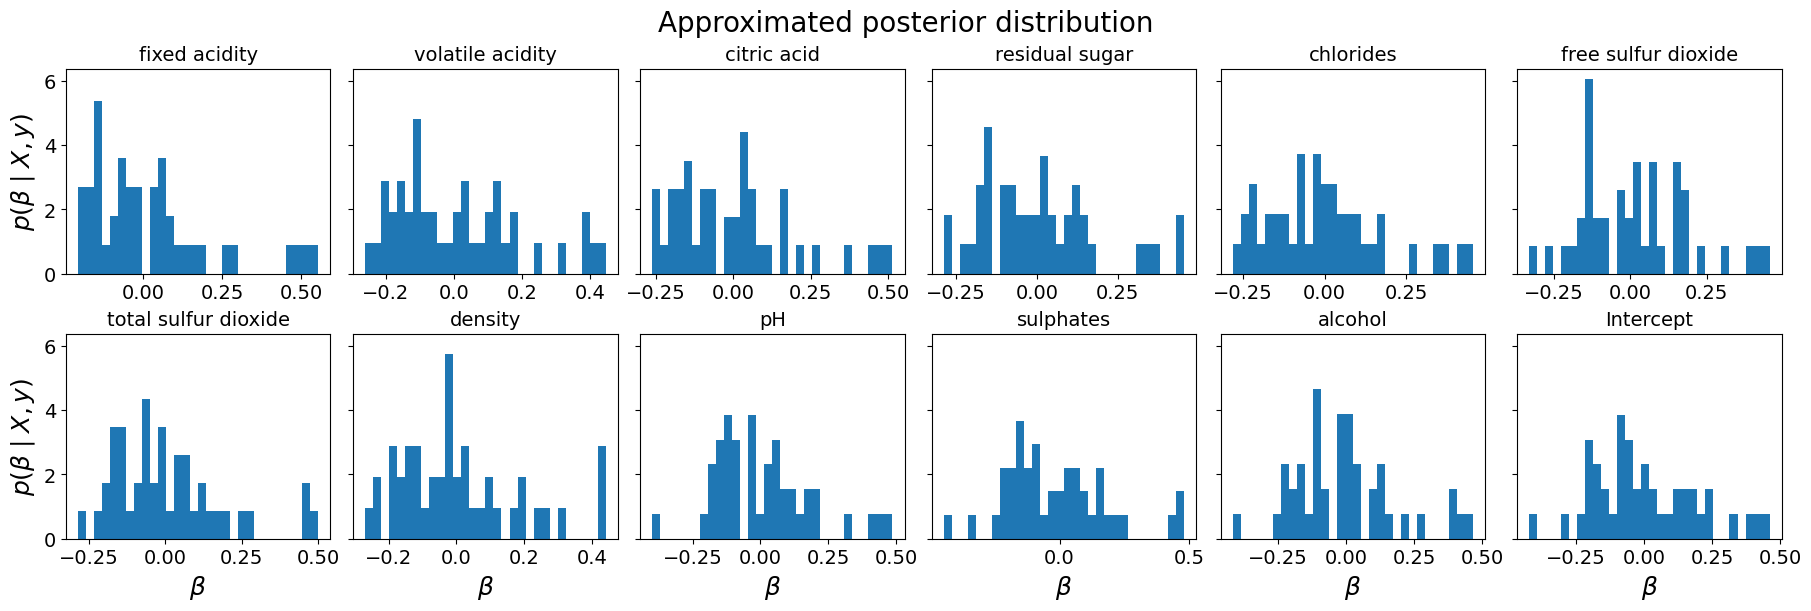

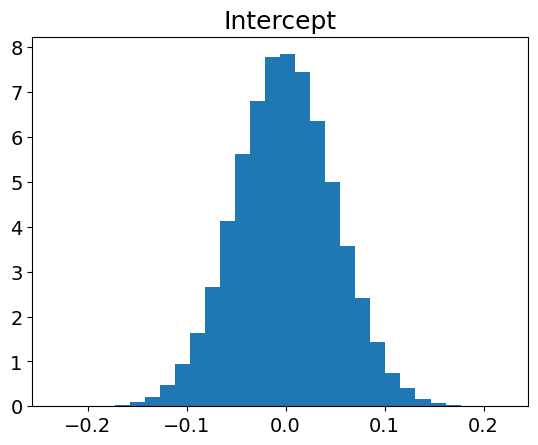

In [25]:
import scipy.stats as stats

def get_hdi(s, intv=0.95):
    # Calculate the HDI for the posterior distribution of each coefficient
    hdis = []
    for i in range(s.shape[1]):
        hdi = stats.mstats.hdquantiles(s[:, i], prob=[1-intv, intv])
        hdis.append(hdi)
    return np.array(hdis)




_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True,
                       figsize=(18, 6))
print(len(axes.flatten()))

beta_mean = np.mean(samples['beta'], axis=(0, 1))

for i, ax in enumerate(axes.flatten()):
  if len(beta_mean<12):
    beta_i_samples = samples['beta'][:, i].flatten()
    ax.hist(beta_i_samples, bins=30, density=True)
    ax.set_title(feature_names[i], fontsize=14)





for ax in axes[1, :]:
    ax.set_xlabel(r'$\beta$')
for ax in axes[:, 0]:
    ax.set_ylabel(r'$p(\beta \mid X, y)$')

plt.suptitle('Approximated posterior distribution', fontsize=20);
plt.show()

plt.hist(samples['beta0'].flatten(), bins=30, density=True)
plt.title("Intercept")
plt.show()

_ANSWER:_


12


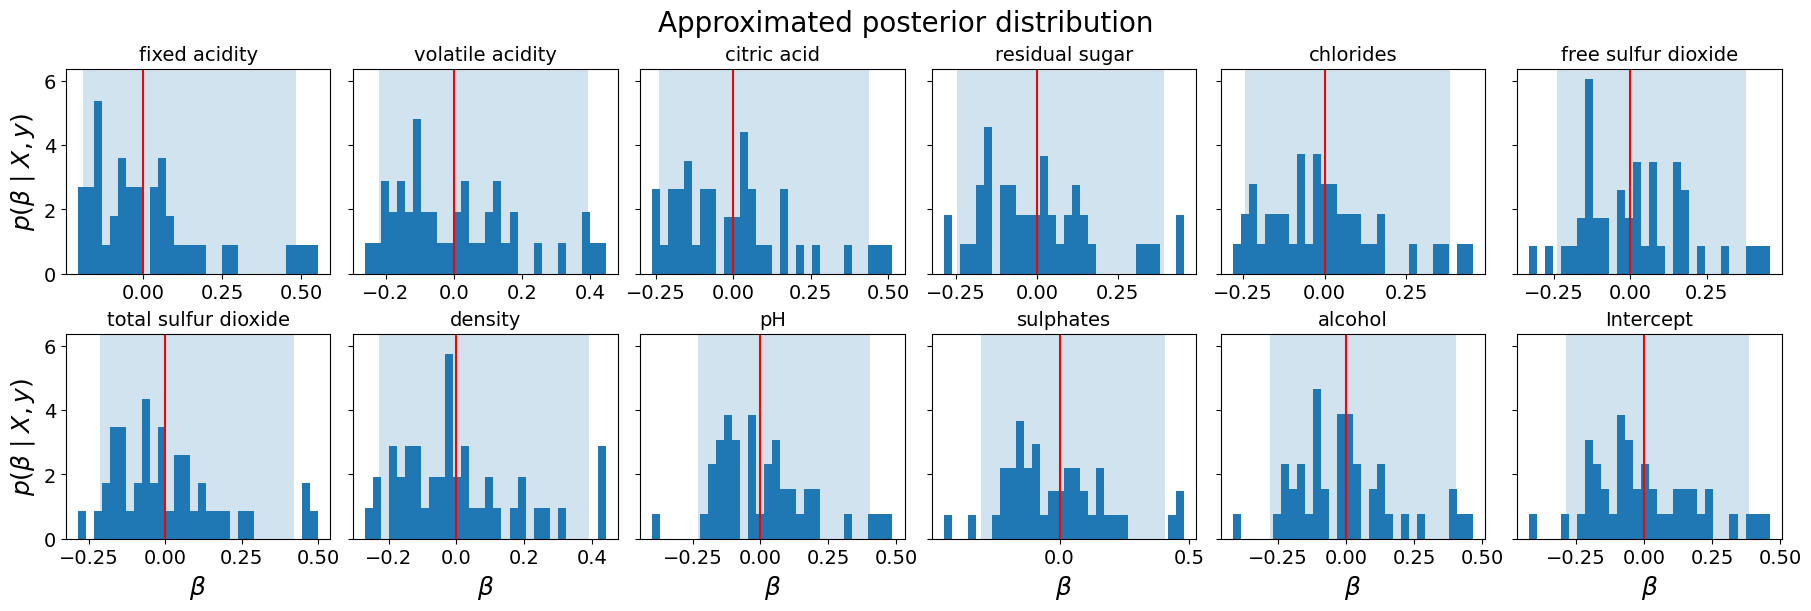

In [26]:
beta_samples = samples['beta']
beta0_samples = samples['beta0']
hdi_beta = get_hdi(beta_samples, intv=0.95)

#hdi_beta0 = get_hdi(beta0_samples, intv=0.95)

x_range = np.linspace(0, 50, num=4)

beta_mean = np.mean(beta_samples, axis=(0, 1))
#beta0_mean = np.mean(beta0_samples, axis=(0, 1))



_, axes = plt.subplots(nrows=2, ncols=6, sharey=True, constrained_layout=True,
                       figsize=(18, 6))
print(len(axes.flatten()))

beta_mean = np.mean(samples['beta'], axis=(0, 1))

for i, ax in enumerate(axes.flatten()):
  if len(beta_mean<12):
    beta_i_samples = samples['beta'][:, i].flatten()
    ax.hist(beta_i_samples, bins=30, density=True)
    #ax.hist(samples['beta0'].flatten(), bins=10, density=True)
    ax.set_title(feature_names[i], fontsize=14)
    beta_lower, beta_upper = hdi_beta[i]
    ax.axvspan(beta_lower, beta_upper, alpha=0.2)
    ax.axvline(x=0,color="red")



for ax in axes[1, :]:
    ax.set_xlabel(r'$\beta$')
for ax in axes[:, 0]:
    ax.set_ylabel(r'$p(\beta \mid X, y)$')

plt.suptitle('Approximated posterior distribution', fontsize=20);
plt.show()

Your analysis has told us which features are important in predicting wine quality. However, a critical remark is that our choice of prior might affect our results.

4. Verify the robustness of your conclusion by changing the scale (=variance/standard deviation/precision) of the prior distribution on the regression coefficients. Do you find quantitatively different results (e.g., different conclusions)?

_ANSWER:_